# Plotly in JupyterLite

`plotly.py` is an interactive, open-source, and browser-based graphing library for Python: https://plotly.com/python/

## Install the dependencies

In [1]:
import micropip
await micropip.install(['pandas', 'plotly==5.1.0'])

## Basic Figure

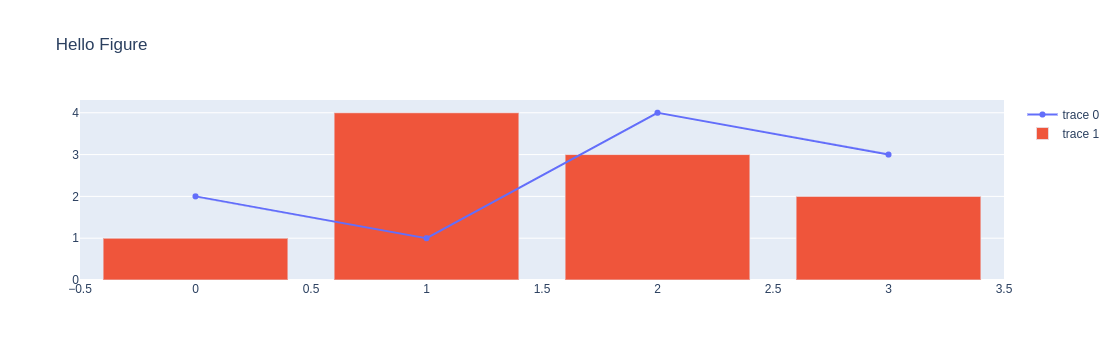

In [2]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello Figure')
fig.show()

## Basic Table with a Pandas DataFrame

/lib/python3.9/site-packages/pandas/compat/__init__.py:117: UserWarning:

Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.



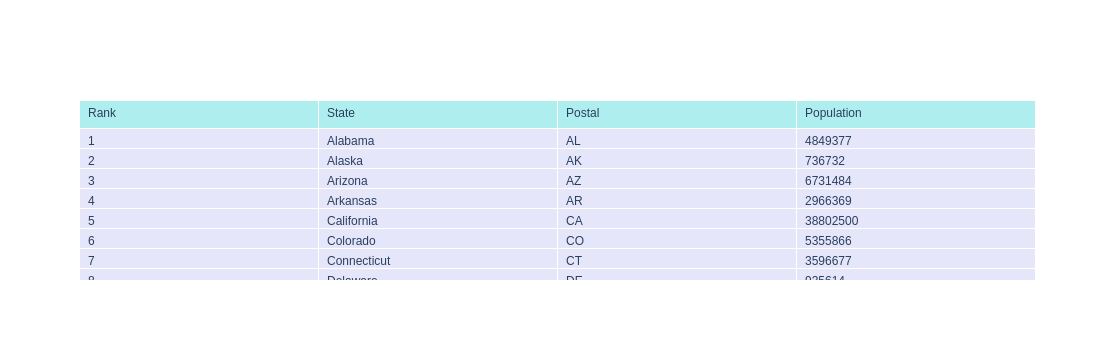

In [3]:
import plotly.graph_objects as go
import pandas as pd

from js import fetch

URL = "https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv"

res = await fetch(URL)
text = await res.text()

filename = 'data.csv'

with open(filename, 'w') as f:
    f.write(text)

df = pd.read_csv(filename)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.Rank, df.State, df.Postal, df.Population],
               fill_color='lavender',
               align='left'))
])

fig.show()

## Quiver Plot with Points

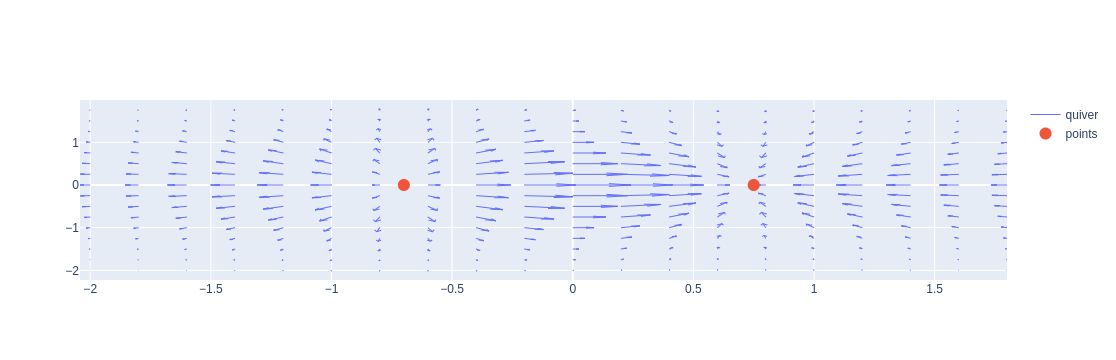

In [4]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

import numpy as np

x,y = np.meshgrid(np.arange(-2, 2, .2),
                  np.arange(-2, 2, .25))
z = x*np.exp(-x**2 - y**2)
v, u = np.gradient(z, .2, .2)

# Create quiver figure
fig = ff.create_quiver(x, y, u, v,
                       scale=.25,
                       arrow_scale=.4,
                       name='quiver',
                       line_width=1)

# Add points to figure
fig.add_trace(go.Scatter(x=[-.7, .75], y=[0,0],
                    mode='markers',
                    marker_size=12,
                    name='points'))

fig.show()